<a href="https://colab.research.google.com/github/Trishul32/ML_LAB/blob/main/Ml_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

Dataset:
   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

Predicted price for 3300 sq ft: 628715.7534246575


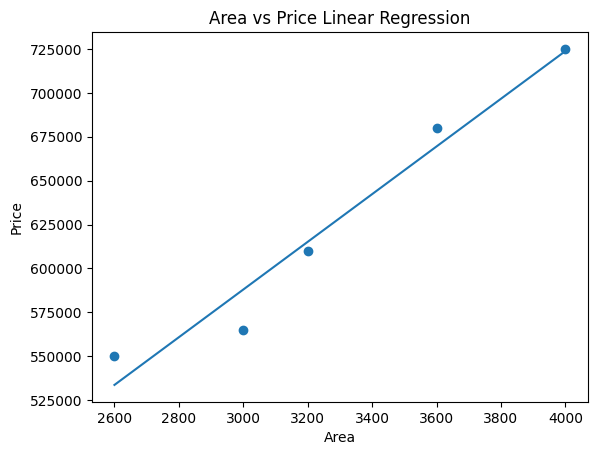

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('/content/housing_area_price.csv')

print("Dataset:")
print(df.head())

# Define input (area) and output (price)
X = df[['area']]
y = df['price']

# Create model
model = LinearRegression()
model.fit(X, y)

# Predict price for 3300 sq ft (Correct way)
new_area = pd.DataFrame({'area': [3300]})
predicted_price = model.predict(new_area)

print("\nPredicted price for 3300 sq ft:", predicted_price[0])

# Plot graph
plt.scatter(df['area'], df['price'])
plt.plot(df['area'], model.predict(X))
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price Linear Regression")
plt.show()

Multiple Regressioon

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

# Load dataset
df = pd.read_csv('/content/homeprices_Multiple_LR.csv')

print("Dataset:")
print(df.head())

# Fill missing bedroom values with median
median_bedrooms = math.floor(df.bedrooms.median())
df.bedrooms = df.bedrooms.fillna(median_bedrooms)

print("\nAfter filling missing values:")
print(df)

# Define features and target
X = df[['area', 'bedrooms', 'age']]
y = df['price']

# Create and train model
model = LinearRegression()
model.fit(X, y)

# Predict price (Correct way)
new_house = pd.DataFrame({
    'area': [3000],
    'bedrooms': [3],
    'age': [40]
})

prediction = model.predict(new_house)

print("\nPredicted price:", prediction[0])

Dataset:
   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000

After filling missing values:
   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

Predicted price: 498408.2515803067


Linear Regession-1

Dataset Preview:
   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583

Predicted Per Capita Income in 2020:
41288.69


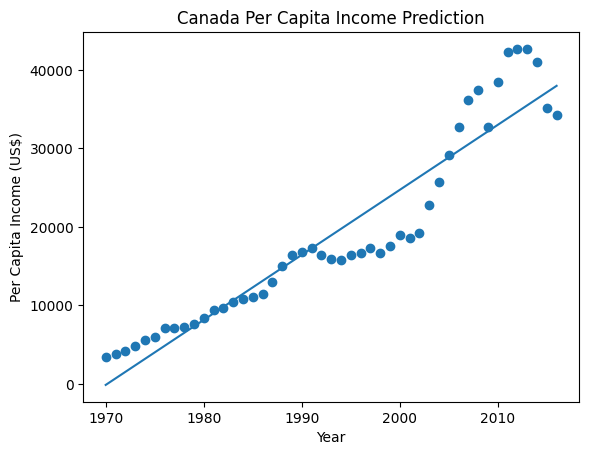

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('/content/canada_per_capita_income.csv')

print("Dataset Preview:")
print(df.head())

# Clean column names
df.columns = df.columns.str.strip()

# Rename columns
df.rename(columns={
    df.columns[0]: 'year',
    df.columns[1]: 'income'
}, inplace=True)

# Define variables
X = df[['year']]
y = df['income']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict for 2020 (Correct way)
new_year = pd.DataFrame({'year': [2020]})
prediction_2020 = model.predict(new_year)

print("\nPredicted Per Capita Income in 2020:")
print(round(prediction_2020[0], 2))

# Plot
plt.scatter(df['year'], df['income'])
plt.plot(df['year'], model.predict(X))
plt.xlabel("Year")
plt.ylabel("Per Capita Income (US$)")
plt.title("Canada Per Capita Income Prediction")
plt.show()

Salary.csv


Dataset Preview:
   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

Predicted Salary for 12 years of experience:
139049.67


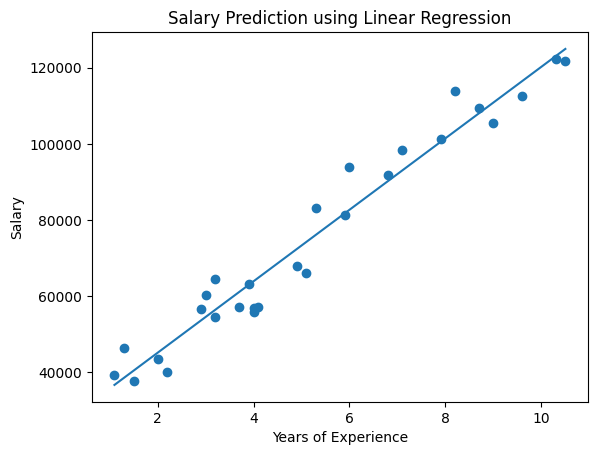

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('/content/salary.csv')

print("Dataset Preview:")
print(df.head())

# Clean column names
df.columns = df.columns.str.strip()

# Rename columns
df.rename(columns={
    df.columns[0]: 'experience',
    df.columns[1]: 'salary'
}, inplace=True)

# Handle missing values
df = df.dropna()

# Define variables
X = df[['experience']]
y = df['salary']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict (Correct way)
new_data = pd.DataFrame({'experience': [12]})
prediction = model.predict(new_data)

print("\nPredicted Salary for 12 years of experience:")
print(round(prediction[0], 2))

# Plot
plt.scatter(df['experience'], df['salary'])
plt.plot(df['experience'], model.predict(X))
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction using Linear Regression")
plt.show()

Hiring.csv

In [15]:
# Step 1: Import required libraries
import pandas as pd
import math
from sklearn.linear_model import LinearRegression

# Step 2: Upload file in Colab (Run only if using Colab)
# from google.colab import files
# uploaded = files.upload()

# Step 3: Load dataset
df = pd.read_csv('/content/hiring.csv')

print("Dataset Preview:")
print(df)

# Step 4: Clean column names
df.columns = df.columns.str.strip()

# Rename columns for simplicity
df.rename(columns={
    df.columns[0]: 'experience',
    df.columns[1]: 'test_score',
    df.columns[2]: 'interview_score',
    df.columns[3]: 'salary'
}, inplace=True)

# Step 5: Handle missing values

# Convert experience words to numbers
word_to_num = {
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11,
    'twelve': 12
}

df['experience'] = df['experience'].apply(
    lambda x: word_to_num.get(str(x).lower(), x)
)

# Fill missing experience with 0
df['experience'] = df['experience'].fillna(0)

# Fill missing test_score with median
median_test_score = math.floor(df['test_score'].median())
df['test_score'] = df['test_score'].fillna(median_test_score)

print("\nDataset after preprocessing:")
print(df)

# Step 6: Define independent and dependent variables
X = df[['experience', 'test_score', 'interview_score']]
y = df['salary']

# Step 7: Create and train model
model = LinearRegression()
model.fit(X, y)

# Step 8: Predict salaries (Proper DataFrame format — No Warning)

# Candidate 1: 2 yr experience, 9 test score, 6 interview score
candidate1 = pd.DataFrame({
    'experience': [2],
    'test_score': [9],
    'interview_score': [6]
})

salary1 = model.predict(candidate1)

# Candidate 2: 12 yr experience, 10 test score, 10 interview score
candidate2 = pd.DataFrame({
    'experience': [12],
    'test_score': [10],
    'interview_score': [10]
})

salary2 = model.predict(candidate2)

print("\nPredicted Salary for Candidate 1 (2 yr exp, 9 test, 6 interview):")
print(round(salary1[0], 2))

print("\nPredicted Salary for Candidate 2 (12 yr exp, 10 test, 10 interview):")
print(round(salary2[0], 2))

Dataset Preview:
  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000

Dataset after preprocessing:
   experience  test_score  interview_score  salary
0         0.0         8.0                9   50000
1         0.0         8.0                6   45000
2         5.0         6.0                7   60000
3         2.0        10.0               10   65000
4         7.0         9

In [9]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Step 2: Upload file in Google Colab (Run only if using Colab)
# from google.colab import files
# uploaded = files.upload()

# Step 3: Load dataset
df = pd.read_csv('/content/1000_Companies.csv')

print("Dataset Preview:")
print(df.head())

# Step 4: Clean column names
df.columns = df.columns.str.strip()

# Step 5: Separate features and target
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']

# Step 6: Convert categorical column 'State' into dummy variables
X = pd.get_dummies(X, columns=['State'], drop_first=True)

print("\nAfter One-Hot Encoding:")
print(X.head())

# Step 7: Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 8: Prepare input for prediction
# Given:
# 91694.48 R&D
# 515841.3 Administration
# 11931.24 Marketing
# Florida State

# Create input in same format as training data
input_data = pd.DataFrame([{
    'R&D Spend': 91694.48,
    'Administration': 515841.3,
    'Marketing Spend': 11931.24,
    'State': 'Florida'
}])

# Apply same encoding to input
input_data = pd.get_dummies(input_data)

# Ensure same columns as training data
input_data = input_data.reindex(columns=X.columns, fill_value=0)

# Step 9: Predict Profit
predicted_profit = model.predict(input_data)

print("\nPredicted Profit:")
print(round(predicted_profit[0], 2))

Dataset Preview:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

After One-Hot Encoding:
   R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
0  165349.20       136897.80        471784.10          False            True
1  162597.70       151377.59        443898.53          False           False
2  153441.51       101145.55        407934.54           True           False
3  144372.41       118671.85        383199.62          False            True
4  142107.34        91391.77        366168.42           True           False

Predicted Profit:
510570.99
